In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn


### ✅ Phase 0: Setup & Load the Dataset


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("creditcard.csv")

# Display shape and first 5 rows
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### 📊 Phase 1: Exploratory Data Analysis (EDA)
🎯 Goal:
Understand the dataset, class imbalance, and feature behavior before applying any model.

###🔧 Step 1: Check Class Distribution--->
We want to see how many fraud vs normal transactions are in the dataset.

In [7]:
# Count of normal vs fraud transactions
df['Class'].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
fraud_percentage = df['Class'].value_counts(normalize=True) * 100
print(fraud_percentage)


Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


###📊 Step 2: Visualize the Class Imbalance ---->
Let’s draw a bar chart:

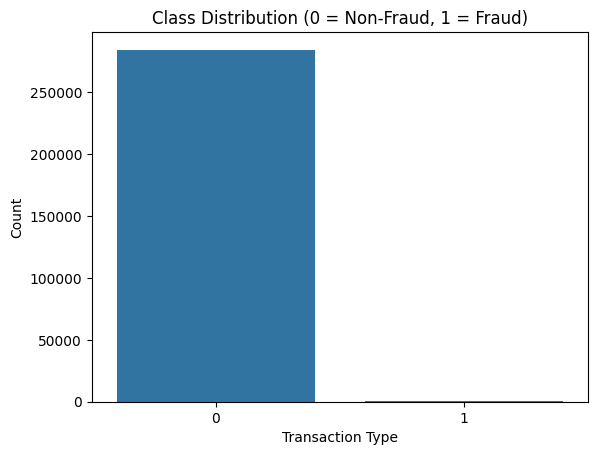

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Class')
plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

###📈 Step 3: Transaction Amount Distribution --->
Let’s check how Amount varies in fraud vs non-fraud:

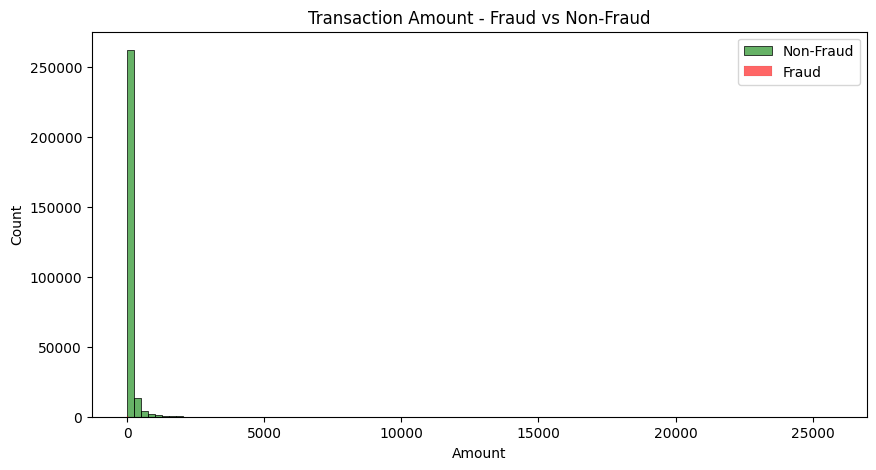

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=100, color='green', label='Non-Fraud', alpha=0.6)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=100, color='red', label='Fraud', alpha=0.6)
plt.legend()
plt.title("Transaction Amount - Fraud vs Non-Fraud")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.show()


###📉 Step 4: Correlation Heatmap (Optional but Insightful)
Let’s check correlations between features and the Class:

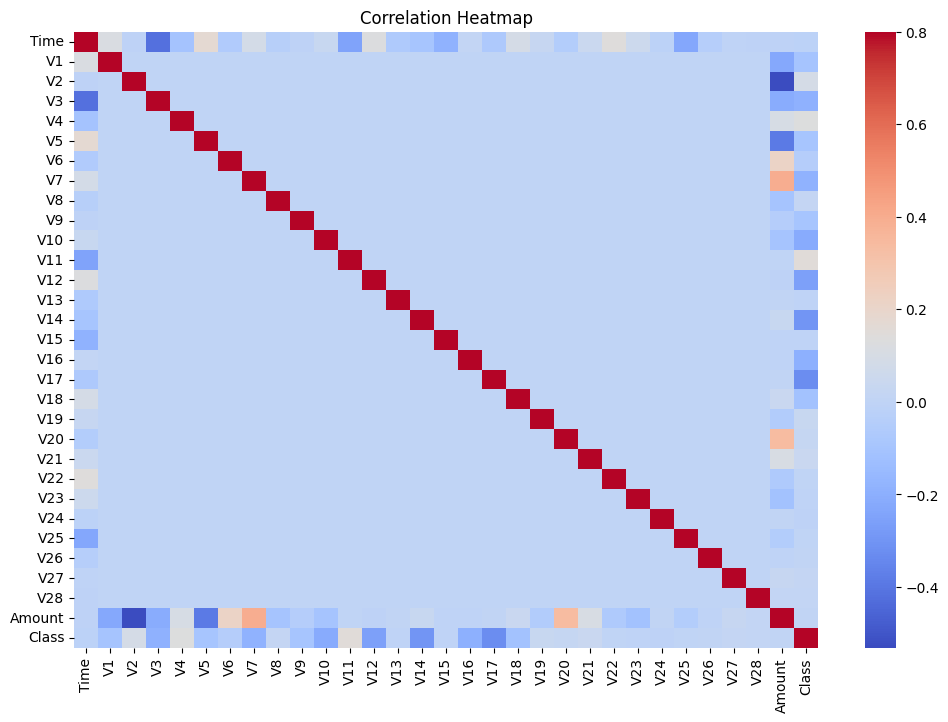

In [14]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', vmax=0.8)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
corr_target = df.corr()['Class'].sort_values(ascending=False)
print(corr_target)


### ⚙️ Phase 2: Data Preprocessing:
🎯 Goal:
Prepare the data so it’s ready for unsupervised anomaly detection algorithms like Isolation Forest and LOF.

We will:
Separate features and target
Scale the features (optional but recommended)
Prepare data for modeling

###🧱 Step 1: Separate Features (X) and Target (y)

In [18]:
# Drop target column to get features (X)
X = df.drop(columns=['Class'])

# Target column (y)
y = df['Class']

###📏 Step 2: Normalize or Scale the Data (Optional but Recommended)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### 🤖 Phase 3: Model Building with Isolation Forest & Local Outlier Factor
🎯 Goal:
Apply unsupervised anomaly detection algorithms to detect fraudulent transactions — without needing labeled training data.

###🛠️ Step 1: Import Required Modules

In [23]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

###🔧 Step 2: Set Contamination Rate
Set it equal to % of fraud cases in the dataset:

In [25]:
fraud_ratio = y.value_counts()[1] / y.shape[0]
print(f"Contamination (fraud ratio): {fraud_ratio:.6f}")

Contamination (fraud ratio): 0.001727


In [26]:
contamination = fraud_ratio


###🔍 Step 3: Apply Isolation Forest

In [28]:
iso_model = IsolationForest(n_estimators=100, contamination=contamination, random_state=42)
iso_pred = iso_model.fit_predict(X_scaled)


In [29]:
iso_pred = np.where(iso_pred == 1, 0, 1)


###🧪 Step 4: Apply Local Outlier Factor

In [31]:
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=contamination)
lof_pred = lof_model.fit_predict(X_scaled)


In [52]:
lof_pred = np.where(lof_pred == 1, 0, 1)


###📋 Step 5: Evaluate Both Models
Define this function to avoid repeating:

In [55]:
def evaluate_model(name, y_true, y_pred):
    print(f"📌 Evaluation for: {name}")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred, digits=4))
    print("="*50)


In [57]:
evaluate_model("Isolation Forest", y, iso_pred)
evaluate_model("Local Outlier Factor", y, lof_pred)


📌 Evaluation for: Isolation Forest
[[283949    366]
 [   366    126]]
              precision    recall  f1-score   support

           0     0.9987    0.9987    0.9987    284315
           1     0.2561    0.2561    0.2561       492

    accuracy                         0.9974    284807
   macro avg     0.6274    0.6274    0.6274    284807
weighted avg     0.9974    0.9974    0.9974    284807

📌 Evaluation for: Local Outlier Factor
[[283823    492]
 [   492      0]]
              precision    recall  f1-score   support

           0     0.9983    0.9983    0.9983    284315
           1     0.0000    0.0000    0.0000       492

    accuracy                         0.9965    284807
   macro avg     0.4991    0.4991    0.4991    284807
weighted avg     0.9965    0.9965    0.9965    284807



### 📊 Evaluation Summary: Isolation Forest vs Local Outlier Factor (LOF)
✅ Isolation Forest

🔢 Key Metrics:
Precision (fraud) = 0.2561 → About 1 in 4 flagged frauds were actually fraud.

Recall (fraud) = 0.2561 → It detected 126 out of 492 actual frauds.
    
F1-score = 0.2561 → A balance of precision and recall.

Accuracy = 99.74% → High, but not very meaningful because of the class imbalance.

it did a decent job caught 25% fraud specically since it didnt used any labled fraud data.There are some false positives (366) and false negatives (366), but that’s expected.

❌ Local Outlier Factor (LOF):

🔢 Key Metrics:
Precision (fraud) = 0.0000 → It predicted some frauds, but none were correct.
    
Recall (fraud) = 0.0000 → It detected 0 out of 492 actual frauds.
    
F1-score = 0.0000

Accuracy = 99.65% → Again, misleading due to class imbalance.
    
completely faild didn't able to detect farud at all predicted everything as normal 


### ✅ Phase 4: Final Evaluation, Observations 
🎯 Goal:
Summarize everything
Extract key learnings and insights



###✅ Key Observations:
Isolation Forest worked better than LOF

LOF failed on the large dataset (can be removed or kept for comparison)

Accuracy is high but misleading, so we rely on precision, recall

Detected 25% of frauds using an unsupervised algorithm with no labels

we now understand why fraud detection is tricky and how anomaly detection helps